In [1]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
from dython.nominal import associations
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', size=16)
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

from pycaret.regression import *




/Users/marwahfaraj/miniconda3/envs/my_env/lib/python3.8/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/marwahfaraj/miniconda3/envs/my_env/lib/python3.8/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:
/var/folders/82/m9t9280x1r134kqynmcb35l40000gn/T/ipykernel_27819/2146462890.py:3: DeprecationWa

In [2]:
# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [20]:
# List of encodings to try
encodings = ['utf-8', 'latin-1', 'utf-16']

# Try reading the file with different encodings
for encoding in encodings:
    try:
        pitches_metadata = pd.read_csv('pitch_by_pitch_metadata.csv', encoding=encoding)
        # If reading is successful, break out of the loop
        break
    except UnicodeDecodeError:
        # If decoding fails, try the next encoding
        continue

pitches_metadata


,column_name,available_prior_to_pitch,description
0,uid,Yes,unique id
1,game_pk,Yes,unique game id
2,year,Yes,year
3,date,Yes,date
4,team_id_b,Yes,team_id for the batting team
5,team_id_p,Yes,team_id for the pitching team
6,inning,Yes,inning number
7,top,Yes,binary: is top half of inning
8,at_bat_num,Yes,incrementing at bat count for game
9,pcount_at_bat,Yes,pitches thrown in at bat


## Extracting the feature that has value prior the pitch

In [18]:
for i, j,k in zip(pitches_metadata['column_name'], pitches_metadata['available_prior_to_pitch'], pitches_metadata['description']):
    if j == 'Yes':
        print(i)

uid
game_pk
year
date
team_id_b
team_id_p
inning
top
at_bat_num
pcount_at_bat
pcount_pitcher
balls
strikes
fouls
outs
start_tfs
start_tfs_zulu
batter_id
stand
b_height
pitcher_id
p_throws
away_team_runs
home_team_runs
pitch_id
on_1b
on_2b
on_3b


In [82]:
# Read the CSV file
pitches_df = pd.read_csv('pitches', encoding='utf-8', low_memory=False)

In [85]:

# Read the CSV file
pitches_df = pd.read_csv('pitches', encoding='utf-8', low_memory=False)

# Display the data with choosing the features that will hace values prior the pitch
pitches_df= pitches_df[['uid','game_pk','year','date','team_id_b','team_id_p','inning','top','at_bat_num','pcount_at_bat','pcount_pitcher','balls',
'strikes','fouls','outs','start_tfs','start_tfs_zulu','batter_id','stand','b_height','pitcher_id','p_throws','away_team_runs','home_team_runs',
'pitch_id','on_1b','on_2b','on_3b', 'pitch_type']]
pitches_df.head(10)

,uid,game_pk,year,date,team_id_b,team_id_p,inning,top,at_bat_num,pcount_at_bat,pcount_pitcher,balls,strikes,fouls,outs,start_tfs,start_tfs_zulu,batter_id,stand,b_height,pitcher_id,p_throws,away_team_runs,home_team_runs,pitch_id,on_1b,on_2b,on_3b,pitch_type
0,14143226,286874,2011,2011-03-31,108,118,1,1,1,1,1,0,0,0,0,201226,2011-03-31 20:12:26,430895,L,5-8,460024,R,0,0,3,NaN,NaN,NaN,NaN
1,14143227,286874,2011,2011-03-31,108,118,1,1,1,2,2,1,0,0,0,201226,2011-03-31 20:12:26,430895,L,5-8,460024,R,0,0,4,NaN,NaN,NaN,NaN
2,14143228,286874,2011,2011-03-31,108,118,1,1,1,3,3,2,0,0,0,201226,2011-03-31 20:12:26,430895,L,5-8,460024,R,0,0,5,NaN,NaN,NaN,NaN
3,14143229,286874,2011,2011-03-31,108,118,1,1,1,4,4,2,1,0,0,201226,2011-03-31 20:12:26,430895,L,5-8,460024,R,0,0,6,NaN,NaN,NaN,NaN
4,14143230,286874,2011,2011-03-31,108,118,1,1,2,1,5,0,0,0,1,201354,2011-03-31 20:13:54,435062,R,5-10,460024,R,0,0,10,NaN,NaN,NaN,NaN
5,14143231,286874,2011,2011-03-31,108,118,1,1,2,2,6,0,1,0,1,201354,2011-03-31 20:13:54,435062,R,5-10,460024,R,0,0,11,NaN,NaN,NaN,NaN
6,14143232,286874,2011,2011-03-31,108,118,1,1,2,3,7,1,1,0,1,201354,2011-03-31 20:13:54,435062,R,5-10,460024,R,0,0,12,NaN,NaN,NaN,NaN
7,14143233,286874,2011,2011-03-31,108,118,1,1,2,4,8,1,2,1,1,201354,2011-03-31 20:13:54,435062,R,5-10,460024,R,0,0,13,NaN,NaN,NaN,NaN
8,14143234,286874,2011,2011-03-31,108,118,1,1,2,5,9,2,2,1,1,201354,2011-03-31 20:13:54,435062,R,5-10,460024,R,0,0,14,NaN,NaN,NaN,NaN
9,14143235,286874,2011,2011-03-31,108,118,1,1,2,6,10,2,2,2,1,201354,2011-03-31 20:13:54,435062,R,5-10,460024,R,0,0,15,NaN,NaN,NaN,NaN


In [86]:
pitches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718961 entries, 0 to 718960
Data columns (total 29 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   uid             718961 non-null  int64  
 1   game_pk         718961 non-null  int64  
 2   year            718961 non-null  int64  
 3   date            718961 non-null  object 
 4   team_id_b       718961 non-null  int64  
 5   team_id_p       718961 non-null  int64  
 6   inning          718961 non-null  int64  
 7   top             718961 non-null  int64  
 8   at_bat_num      718961 non-null  int64  
 9   pcount_at_bat   718961 non-null  int64  
 10  pcount_pitcher  718961 non-null  int64  
 11  balls           718961 non-null  int64  
 12  strikes         718961 non-null  int64  
 13  fouls           718961 non-null  int64  
 14  outs            718961 non-null  int64  
 15  start_tfs       718961 non-null  int64  
 16  start_tfs_zulu  718961 non-null  object 
 17  batter_id 

In [ ]:
pitches_df.describe().T

,count,mean,std,min,25%,50%,75%,max
uid,718961.0,1.701980e+07,1.665143e+06,14143226.0,15573563.0,17031064.0,18458937.0,19838196.0
game_pk,718961.0,2.885576e+05,3.642211e+03,286874.0,287507.0,288129.0,288749.0,317073.0
year,718961.0,2.011000e+03,0.000000e+00,2011.0,2011.0,2011.0,2011.0,2011.0
team_id_b,718961.0,1.287872e+02,1.428104e+01,108.0,115.0,134.0,141.0,158.0
team_id_p,718961.0,1.287573e+02,1.430671e+01,108.0,115.0,134.0,141.0,158.0
inning,718961.0,5.033796e+00,2.692326e+00,1.0,3.0,5.0,7.0,19.0
top,718961.0,5.088996e-01,4.999211e-01,0.0,0.0,1.0,1.0,1.0
at_bat_num,718961.0,3.930151e+01,2.332072e+01,1.0,19.0,39.0,58.0,158.0
pcount_at_bat,718961.0,2.865276e+00,1.715068e+00,1.0,1.0,3.0,4.0,16.0
pcount_pitcher,718961.0,3.735720e+01,3.069057e+01,1.0,11.0,28.0,61.0,133.0


In [34]:
pitches_df['pitch_type'].value_counts()

FF    238541
SL    109756
SI     87740
FT     81056
CH     72641
CU     56379
FC     41702
FS     10503
KC      8490
KN      4450
IN      4058
PO       559
FO       329
FA       204
EP       134
SC       120
UN        17
AB         2
Name: pitch_type, dtype: int64

In [35]:
#Display how many null in each column
for col in pitches_df.columns:
    print(col, pitches_df[col].isnull().sum())

uid 0
game_pk 0
year 0
date 0
team_id_b 0
team_id_p 0
inning 0
top 0
at_bat_num 0
pcount_at_bat 0
pcount_pitcher 0
balls 0
strikes 0
fouls 0
outs 0
start_tfs 0
start_tfs_zulu 0
batter_id 0
stand 0
b_height 0
pitcher_id 0
p_throws 0
away_team_runs 0
home_team_runs 0
pitch_id 0
on_1b 502638
on_2b 579258
on_3b 647326
pitch_type 2280


# early filter the features 

In [36]:
pitches_df.columns.to_list()

['uid',
 'game_pk',
 'year',
 'date',
 'team_id_b',
 'team_id_p',
 'inning',
 'top',
 'at_bat_num',
 'pcount_at_bat',
 'pcount_pitcher',
 'balls',
 'strikes',
 'fouls',
 'outs',
 'start_tfs',
 'start_tfs_zulu',
 'batter_id',
 'stand',
 'b_height',
 'pitcher_id',
 'p_throws',
 'away_team_runs',
 'home_team_runs',
 'pitch_id',
 'on_1b',
 'on_2b',
 'on_3b',
 'pitch_type']

In [96]:
#make copy of the main data
mlb_df=pitches_df.copy()
mlb_df= mlb_df[['team_id_b','team_id_p','inning','top','at_bat_num','pcount_at_bat','pcount_pitcher','balls',
                'strikes','fouls','outs','start_tfs','start_tfs_zulu','batter_id','stand','b_height','pitcher_id','p_throws','away_team_runs',
                'home_team_runs','pitch_id','pitch_type']]
mlb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718961 entries, 0 to 718960
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   team_id_b       718961 non-null  int64 
 1   team_id_p       718961 non-null  int64 
 2   inning          718961 non-null  int64 
 3   top             718961 non-null  int64 
 4   at_bat_num      718961 non-null  int64 
 5   pcount_at_bat   718961 non-null  int64 
 6   pcount_pitcher  718961 non-null  int64 
 7   balls           718961 non-null  int64 
 8   strikes         718961 non-null  int64 
 9   fouls           718961 non-null  int64 
 10  outs            718961 non-null  int64 
 11  start_tfs       718961 non-null  int64 
 12  start_tfs_zulu  718961 non-null  object
 13  batter_id       718961 non-null  int64 
 14  stand           718961 non-null  object
 15  b_height        718961 non-null  object
 16  pitcher_id      718961 non-null  int64 
 17  p_throws        718961 non-nu

## Check the existence of duplicate in the data

### Our data does not contain any duplicate

In [38]:
# Check for duplicates
duplicates = mlb_df.duplicated()

# Count the number of duplicates
num_duplicates = duplicates.sum()
num_duplicates

0

In [39]:
# Check for duplicates and display them
duplicates = mlb_df.duplicated(keep=False)
duplicate_rows = mlb_df[duplicates]

# Display the duplicate rows
print(duplicate_rows)


Empty DataFrame
Columns: [uid, game_pk, year, date, team_id_b, team_id_p, inning, top, at_bat_num, pcount_at_bat, pcount_pitcher, balls, strikes, fouls, outs, start_tfs, start_tfs_zulu, batter_id, stand, b_height, pitcher_id, p_throws, away_team_runs, home_team_runs, pitch_id, on_1b, on_2b, on_3b, pitch_type]
Index: []


# Using pandas profiling to get profiling report for your DataFrame

### I tried to use data profiling which good tool to analyze the data and understand it more, but it collapsing due to memory suffering on my machine

In [49]:
profile = ProfileReport(mlb_df)
profile
profile.to_widgets()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

# Explore Target class/ data balance

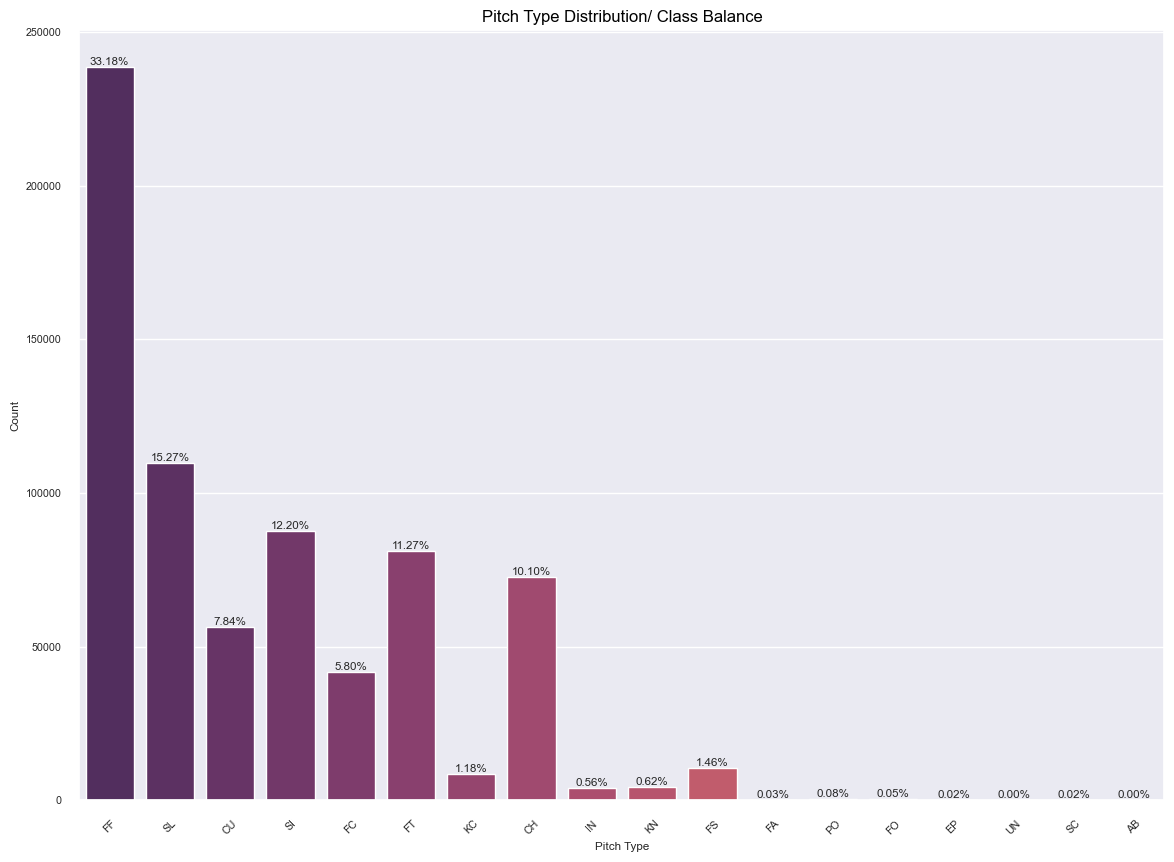

In [101]:
#drop the nan value from the pitch_type
# mlb_df= mlb_df.dropna(axis=1)

plt.figure(figsize=(14,10))
ax = sns.countplot(data=mlb_df, x='pitch_type',palette='flare_r')
plt.title('Pitch Type Distribution/ Class Balance', fontsize= 12, color='black')
plt.xlabel('Pitch Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Calculate total count
total_count = len(mlb_df)

# Add percentage annotations
for p in ax.patches:
    count = p.get_height()
    percentage = count / total_count * 100
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2, count), ha='center', va='bottom')

plt.savefig("images/class_imbalance.jpg",  bbox_inches='tight')
plt.show()

# independent Features correlation with the dependent Target, and investigating multicollinearity between the independent features

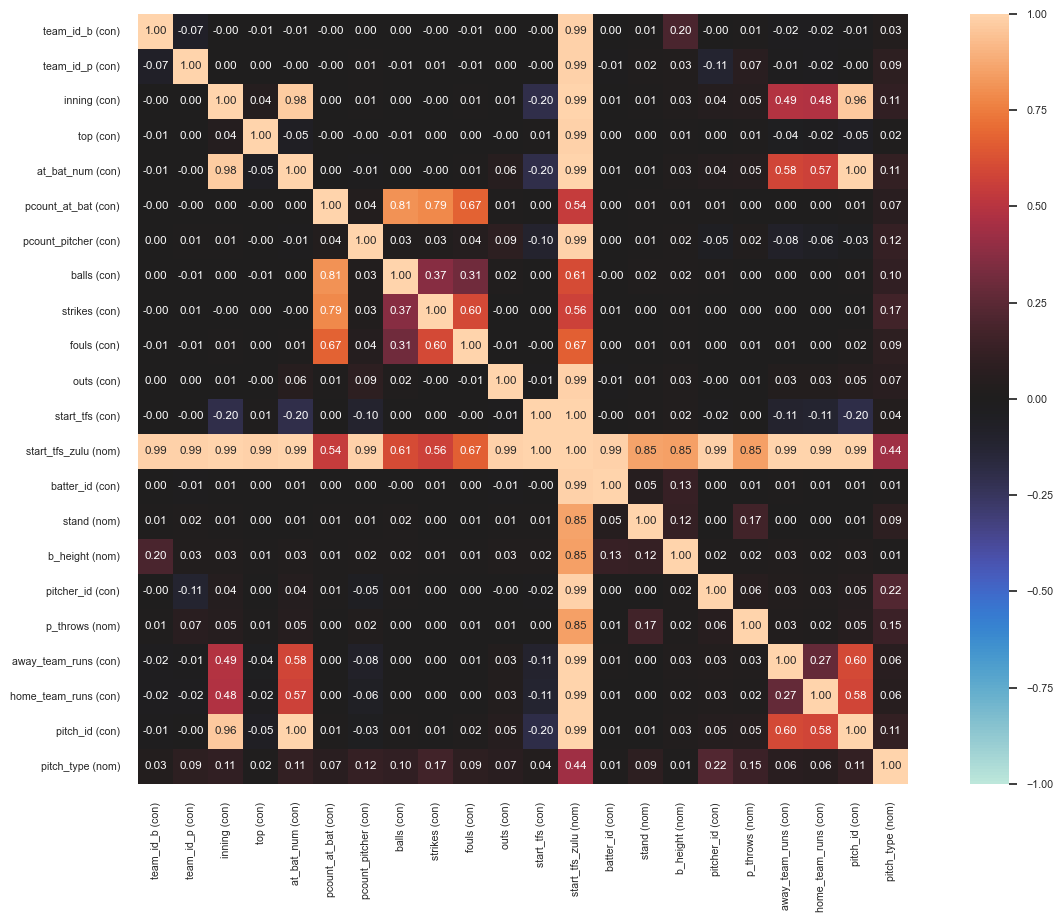

In [81]:
# Build the correlation heatmap graph
sns.set(font_scale=0.7)
associations(mlb_df, figsize=(16, 10), nom_num_assoc='correlation_ratio', mark_columns=True)
plt.show()
# ['inning', 'top','strikes','fouls','outs','start_tfs_zulu','b_height','type', 'p_throws','pitch_tfs','pitch_tfs_zulu','x','y','encoded_pitch_type']]

## There is multicollinearity between several features and that will affect the model performance and will keep the feature that has a higher correlation with the target

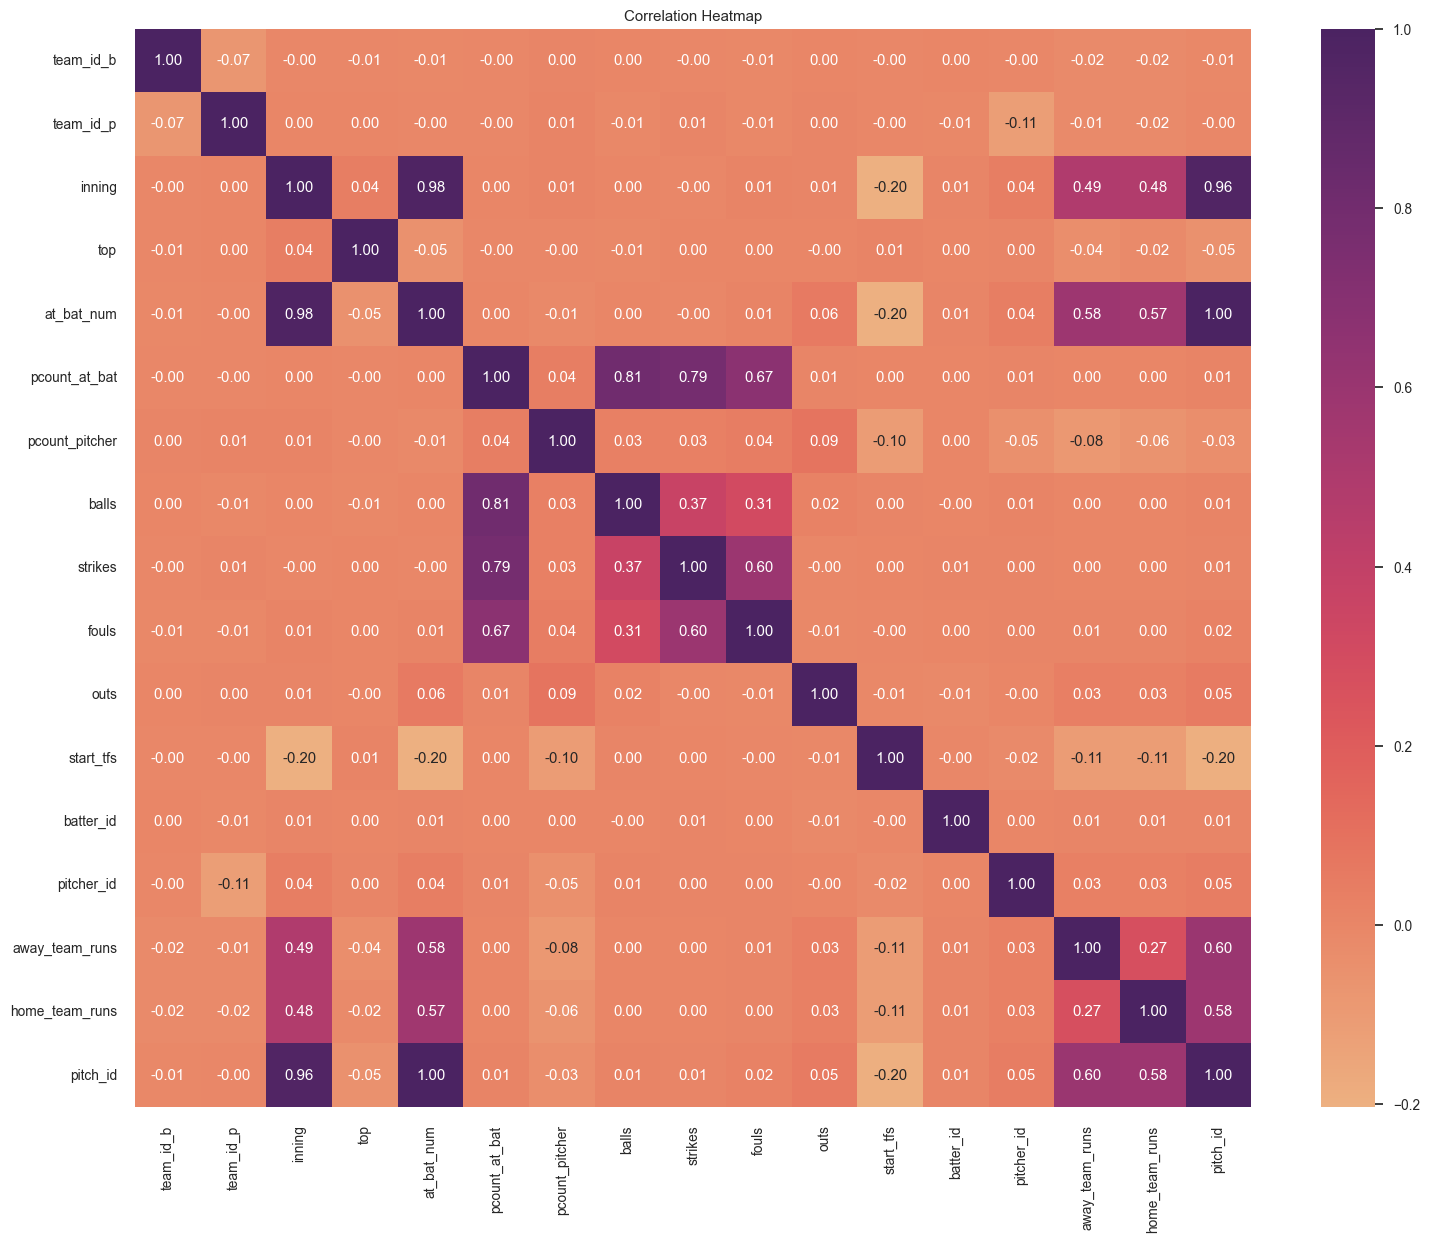

In [52]:
# Compute the correlation matrix for the feature that the dython nominal failed to present

corr_matrix = mlb_df.corr()


# Build the correlation heatmap graph
sns.set(font_scale=0.9)
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, cmap='flare', annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [57]:
mlb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718961 entries, 0 to 718960
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   team_id_b       718961 non-null  int64 
 1   team_id_p       718961 non-null  int64 
 2   inning          718961 non-null  int64 
 3   top             718961 non-null  int64 
 4   at_bat_num      718961 non-null  int64 
 5   pcount_at_bat   718961 non-null  int64 
 6   pcount_pitcher  718961 non-null  int64 
 7   balls           718961 non-null  int64 
 8   strikes         718961 non-null  int64 
 9   fouls           718961 non-null  int64 
 10  outs            718961 non-null  int64 
 11  start_tfs       718961 non-null  int64 
 12  start_tfs_zulu  718961 non-null  object
 13  batter_id       718961 non-null  int64 
 14  stand           718961 non-null  object
 15  b_height        718961 non-null  object
 16  pitcher_id      718961 non-null  int64 
 17  p_throws        718961 non-nu

In [67]:
from sklearn.preprocessing import LabelEncoder
label_mbl= mlb_df.copy()
encoder = LabelEncoder()
label_mbl['encoded_pitch_type'] = encoder.fit_transform(mlb_df['pitch_type'])
label_mbl.head(20)

,team_id_b,team_id_p,inning,top,at_bat_num,pcount_at_bat,pcount_pitcher,balls,strikes,fouls,outs,start_tfs,start_tfs_zulu,batter_id,stand,b_height,pitcher_id,p_throws,away_team_runs,home_team_runs,pitch_id,pitch_type,encoded_pitch_type
0,108,118,1,1,1,1,1,0,0,0,0,201226,2011-03-31 20:12:26,430895,L,5-8,460024,R,0,0,3,NaN,18
1,108,118,1,1,1,2,2,1,0,0,0,201226,2011-03-31 20:12:26,430895,L,5-8,460024,R,0,0,4,NaN,18
2,108,118,1,1,1,3,3,2,0,0,0,201226,2011-03-31 20:12:26,430895,L,5-8,460024,R,0,0,5,NaN,18
3,108,118,1,1,1,4,4,2,1,0,0,201226,2011-03-31 20:12:26,430895,L,5-8,460024,R,0,0,6,NaN,18
4,108,118,1,1,2,1,5,0,0,0,1,201354,2011-03-31 20:13:54,435062,R,5-10,460024,R,0,0,10,NaN,18
5,108,118,1,1,2,2,6,0,1,0,1,201354,2011-03-31 20:13:54,435062,R,5-10,460024,R,0,0,11,NaN,18
6,108,118,1,1,2,3,7,1,1,0,1,201354,2011-03-31 20:13:54,435062,R,5-10,460024,R,0,0,12,NaN,18
7,108,118,1,1,2,4,8,1,2,1,1,201354,2011-03-31 20:13:54,435062,R,5-10,460024,R,0,0,13,NaN,18
8,108,118,1,1,2,5,9,2,2,1,1,201354,2011-03-31 20:13:54,435062,R,5-10,460024,R,0,0,14,NaN,18
9,108,118,1,1,2,6,10,2,2,2,1,201354,2011-03-31 20:13:54,435062,R,5-10,460024,R,0,0,15,NaN,18


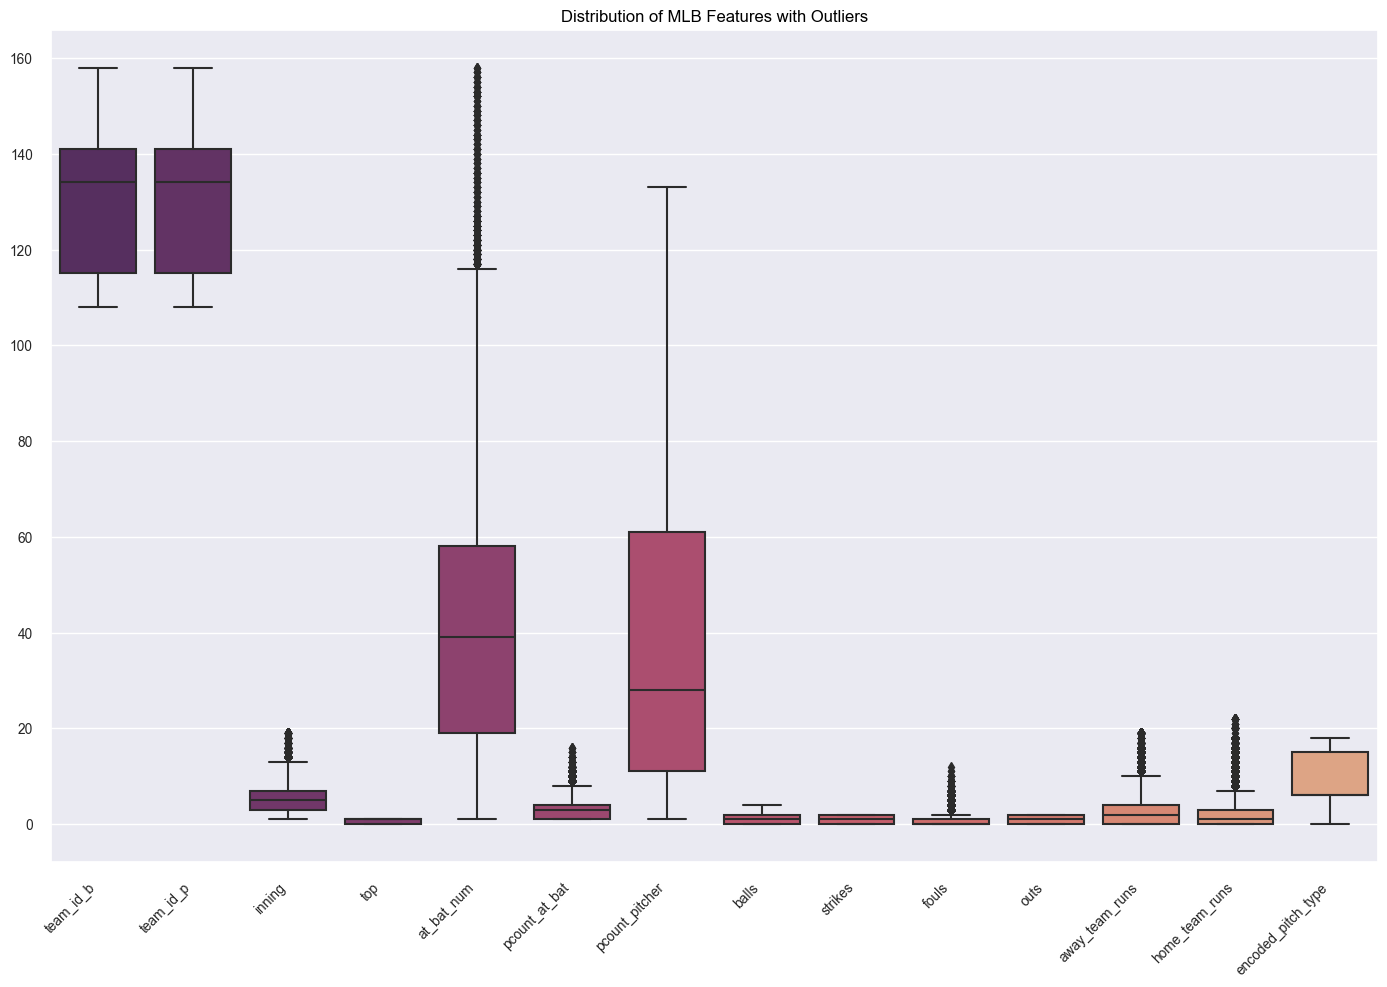

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
ax = sns.boxplot(data=label_mbl[['team_id_b', 'team_id_p', 'inning', 'top', 'at_bat_num', 'pcount_at_bat',
                                 'pcount_pitcher', 'balls', 'strikes', 'fouls', 'outs', 'away_team_runs',
                                 'home_team_runs', 'encoded_pitch_type']], palette='flare_r',  showfliers=True)

labels = ['team_id_b', 'team_id_p', 'inning', 'top', 'at_bat_num', 'pcount_at_bat', 'pcount_pitcher', 'balls',
          'strikes', 'fouls', 'outs', 'away_team_runs', 'home_team_runs', 'encoded_pitch_type']

ax.set_xticklabels(labels=labels, rotation=45, ha='right')
plt.title("Distribution of MLB Features with Outliers", fontsize= 12, color='black')
plt.tight_layout()
plt.savefig("images/outliers.png",  bbox_inches='tight')
plt.show()
